In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns


df1 = pd.read_csv("final_set.csv")

In [2]:
df1.head()

,Unnamed: 0,playerId,season,name,team,position,situation,games_played,icetime,shifts,...,OffIce_A_xGoals,OffIce_F_shotAttempts,OffIce_A_shotAttempts,xGoalsForAfterShifts,xGoalsAgainstAfterShifts,corsiForAfterShifts,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts,HART
0,0,8462196,2008,Stephane Robidas,DAL,D,other,72,6729,105,...,12.11,106,122,0.14,0.00,4,0,3,0,0.0
1,1,8462196,2008,Stephane Robidas,DAL,D,all,72,105958,2026,...,116.39,2161,2223,0.00,0.00,0,0,0,0,0.0
2,2,8462196,2008,Stephane Robidas,DAL,D,5on5,72,74053,1480,...,74.66,1678,1647,3.64,0.18,91,10,74,8,0.0
3,3,8462196,2008,Stephane Robidas,DAL,D,4on5,72,10397,235,...,27.37,57,380,0.15,0.00,3,0,3,0,0.0
4,4,8462196,2008,Stephane Robidas,DAL,D,5on4,72,14779,206,...,1.47,294,42,0.13,0.00,6,0,6,0,0.0


In [2]:
df1.drop("Unnamed: 0", axis=1, inplace=True)

In [3]:
df2 = df1[df1["situation"] == "all"]

In [4]:
matrix = df2.corr()

In [5]:
matrix

,playerId,season,games_played,icetime,shifts,gameScore,onIce_xGoalsPercentage,offIce_xGoalsPercentage,onIce_corsiPercentage,offIce_corsiPercentage,...,OffIce_A_xGoals,OffIce_F_shotAttempts,OffIce_A_shotAttempts,xGoalsForAfterShifts,xGoalsAgainstAfterShifts,corsiForAfterShifts,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts,HART
playerId,1.000000,0.642117,-0.228614,-0.218406,-0.229629,-0.119377,-0.006611,-0.040749,0.005419,-0.043986,...,-0.172110,-0.212770,-0.202717,NaN,NaN,NaN,NaN,NaN,NaN,0.000342
season,0.642117,1.000000,-0.043302,-0.036617,-0.047770,-0.000896,-0.022058,0.011523,-0.013412,0.014233,...,0.005887,-0.031411,-0.033607,NaN,NaN,NaN,NaN,NaN,NaN,-0.002133
games_played,-0.228614,-0.043302,1.000000,0.925224,0.948895,0.716996,0.220257,0.027963,0.205423,0.002266,...,0.962557,0.963994,0.975147,NaN,NaN,NaN,NaN,NaN,NaN,0.052184
icetime,-0.218406,-0.036617,0.925224,1.000000,0.989425,0.781982,0.253112,-0.012230,0.249209,-0.037710,...,0.818363,0.814011,0.839403,NaN,NaN,NaN,NaN,NaN,NaN,0.075940
shifts,-0.229629,-0.047770,0.948895,0.989425,1.000000,0.754114,0.228030,0.013987,0.219116,-0.006615,...,0.852845,0.859059,0.872850,NaN,NaN,NaN,NaN,NaN,NaN,0.059035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
corsiForAfterShifts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
corsiAgainstAfterShifts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fenwickForAfterShifts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fenwickAgainstAfterShifts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
null_values = df2.isnull().sum()

In [9]:
null_values

playerId                     0
season                       0
name                         0
team                         0
position                     0
                            ..
corsiForAfterShifts          0
corsiAgainstAfterShifts      0
fenwickForAfterShifts        0
fenwickAgainstAfterShifts    0
HART                         0
Length: 155, dtype: int64

In [59]:
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", 200)

In [8]:
df3 = df2.drop(["playerId", "season", "name", "team", "situation", "games_played"], axis=1)

In [9]:
#encode categorical variables

df4 = pd.get_dummies(df3, columns=["position"], drop_first="true")

In [10]:
#split into target and features
X = df4.drop("HART", axis=1)
y = df4["HART"]

In [11]:
from sklearn.model_selection import train_test_split


#split into testing and training set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state=0)

In [12]:
#split into numerical and categorical data

train_cat = X_train[["position_D", "position_L", "position_R"]]
train_num = X_train.drop(["position_D", "position_L", "position_R"], axis=1)

In [13]:
#oversample data

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
ros.fit(X_train, y_train)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [14]:
X_train = X_resampled
y_train = y_resampled

In [15]:
y_resampled.shape

(17432,)

In [16]:
#scale features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [17]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [18]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([0., 0., 0., ..., 0., 0., 0.])

In [19]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.9952


In [20]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array([0., 0., 0., ..., 1., 1., 1.])

In [21]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9980


In [22]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.9980
Test set score: 0.9952


In [23]:
# fit the Logsitic Regression model with C=100

# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [24]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.9999
Test set score: 0.9949


In [25]:
# fit the Logsitic Regression model with C=001

# instantiate the model
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
logreg001.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [26]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.9894
Test set score: 0.9811


In [27]:
y_test.value_counts()

0.0    2906
1.0       9
Name: HART, dtype: int64

In [28]:
2906/2913

0.9975969790593889

In [29]:
y_train.value_counts()

0.0    8716
1.0    8716
Name: HART, dtype: int64

In [30]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[2892   14]
 [   0    9]]

True Positives(TP) =  2892

True Negatives(TN) =  9

False Positives(FP) =  14

False Negatives(FN) =  0


In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2906
         1.0       0.39      1.00      0.56         9

    accuracy                           1.00      2915
   macro avg       0.70      1.00      0.78      2915
weighted avg       1.00      1.00      1.00      2915



In [32]:
# print classification accuracy
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9952


In [33]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0048


In [34]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9952


In [35]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.3913


In [36]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.6087


In [37]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 1.0000


In [38]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 1.0000


In [39]:
logreg.predict_proba(X_test)[:,0]

array([0.98815748, 0.99996513, 1.        , ..., 1.        , 0.9999949 ,
       0.9999734 ])

In [41]:
ypred_prob = logreg.predict_proba(X_test)[:,1]

In [57]:
df = pd.DataFrame(ypred_prob, columns = ["Probability"])

Text(0, 0.5, 'Frequency')

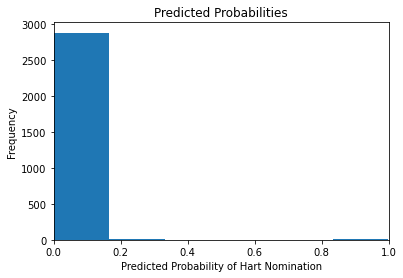

In [45]:
plt.hist(ypred_prob, bins=6)
plt.xlim(0,1)
plt.title('Predicted Probabilities')
plt.xlabel('Predicted Probability of Hart Nomination')
plt.ylabel('Frequency')

In [60]:
df

,Probability
0,1.184252e-02
1,3.486507e-05
2,1.874192e-14
3,1.289375e-08
4,9.268315e-05
...,...
2910,3.491082e-13
2911,4.365240e-12
2912,2.142215e-11
2913,5.097195e-06
